**Introduction**

In today’s rapidly evolving world of human-computer interaction, speech recognition stands as a cornerstone technology. This project focuses on processing and identifying a set of simple voice commands such as “yes,” “no,” “stop,” “go,” “left,” “right,” “up,” and “down.”
To achieve this, we leverage the powerful combination of Deep Learning (DL), Convolutional Neural Networks (CNNs), and Short-Time Fourier Transform (STFT) to extract meaningful audio features and build an accurate classification model.

**Libraries used**

In [38]:
import os
import numpy as np
import pathlib as pt
import seaborn as sns
import matplotlib.pyplot as plt
import IPython
import wave
import pyaudio
import tensorflow as tf
from IPython import display
from keras import models
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,Resizing,Input,Normalization

**Download the desired dataset from Google's website.**

In [2]:
DATASET_PATH="data/"
data_dir=pt.Path(DATASET_PATH)
tf.keras.utils.get_file("voicedataset.zip",origin="https://aiolearn.com/dl/datasets/voicedata.zip",extract=True,cache_dir=".",cache_subdir="data")
print("Done")

Done


**Info**

In [3]:
tf.io.gfile.listdir(str(data_dir))

['down',
 'go',
 'left',
 'no',
 'README.md',
 'right',
 'stop',
 'up',
 'voicedataset.zip',
 'voicedataset_extracted',
 'yes']

**Info**

In [4]:
Commands=np.array(tf.io.gfile.listdir(str(data_dir)))
Commands=Commands[(Commands!="README.md") & (Commands!="voicedataset.zip")]
print("Commands Available:",Commands)

Commands Available: ['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'voicedataset_extracted'
 'yes']


**Body**

In [5]:
X_train,X_test=tf.keras.utils.audio_dataset_from_directory(directory=data_dir,batch_size=64,validation_split=0.2,seed=0,output_sequence_length=16000,subset="both")
Label_names=np.array(X_train.class_names)
print()
print("Label:",Label_names)

Found 16000 files belonging to 9 classes.
Using 12800 files for training.
Using 3200 files for validation.

Label: ['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'voicedataset_extracted'
 'yes']


In [6]:
def squeeze(audio,labels):
    audio=tf.squeeze(audio,axis=-1)
    return audio,labels
X_train=X_train.map(squeeze,tf.data.AUTOTUNE)
X_test=X_test.map(squeeze,tf.data.AUTOTUNE)

In [7]:
X_train.element_spec

(TensorSpec(shape=(None, 16000), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [8]:
val=X_test
X_test=X_test.shard(num_shards=2,index=0)
val=X_test.shard(num_shards=2,index=1)

In [9]:
for x,y in X_train.take(1):
    print(x)
    print(Label_names[y])

tf.Tensor(
[[ 0.00000000e+00 -6.10351562e-05 -6.10351562e-05 ... -9.15527344e-05
  -1.22070312e-04 -9.15527344e-05]
 [-3.66210938e-04 -6.40869141e-04 -1.15966797e-03 ...  1.73950195e-03
   1.92260742e-03  1.77001953e-03]
 [ 4.27246094e-04  5.18798828e-04  1.22070312e-04 ...  1.13220215e-02
   1.14746094e-02  1.46484375e-03]
 ...
 [ 4.69970703e-03  8.60595703e-03  9.97924805e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.96728516e-04  9.76562500e-04  6.40869141e-04 ... -1.06811523e-03
  -1.34277344e-03 -7.01904297e-04]
 [-9.15527344e-05  4.48608398e-03 -1.22070312e-04 ... -2.19726562e-03
  -2.31933594e-03 -2.47192383e-03]], shape=(64, 16000), dtype=float32)
['stop' 'yes' 'left' 'up' 'up' 'voicedataset_extracted' 'up' 'no'
 'voicedataset_extracted' 'voicedataset_extracted' 'go' 'stop'
 'voicedataset_extracted' 'voicedataset_extracted'
 'voicedataset_extracted' 'voicedataset_extracted'
 'voicedataset_extracted' 'voicedataset_extracted' 'no' 'down'
 'voicedataset_extracted

In [10]:
for example_audio,example_labels in X_train.take(1):
    print(example_audio.shape)
    print(example_labels.shape)

(64, 16000)
(64,)


In [ ]:
print(Label_names[[0,1,2]])
print(example_audio[0][5100])

['down' 'go' 'left']
tf.Tensor(0.18380737, shape=(), dtype=float32)


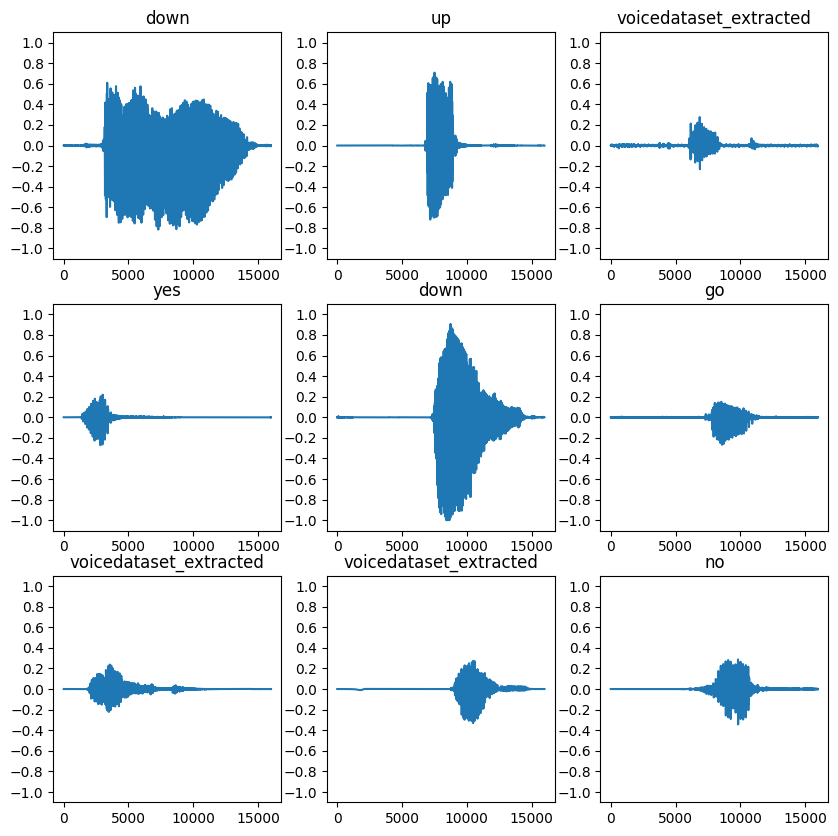

In [12]:
plt.figure(figsize=(10,10))
rows=3
cols=3
n=rows*cols
for i in range(n):
    plt.subplot(rows,cols,i+1)
    audio_signal=example_audio[i]
    plt.plot(audio_signal)
    plt.title(Label_names[example_labels[i]])
    plt.yticks(np.arange(-1.2,1.2,0.2))
    plt.ylim([-1.1,1.1])

In [13]:
def get_spectrogram(waveform):
    spectrogram=tf.signal.stft(waveform,frame_length=255,frame_step=128)
    spectrogram=tf.abs(spectrogram)
    spectrogram=spectrogram[...,tf.newaxis]
    return spectrogram

In [14]:
for i in range(3):
    label=Label_names[example_labels[i]]
    waveform=example_audio[i]
    spectrogram=get_spectrogram(waveform)
    print("Label:",label)
    print("WaveformShape:",waveform.shape)
    print("Spectrogram Shape:",spectrogram.shape)
    print("Audio Playback:")
    display.display(display.Audio(waveform,rate=16000))

Label: down
WaveformShape: (16000,)
Spectrogram Shape: (124, 129, 1)
Audio Playback:


Label: up
WaveformShape: (16000,)
Spectrogram Shape: (124, 129, 1)
Audio Playback:


Label: voicedataset_extracted
WaveformShape: (16000,)
Spectrogram Shape: (124, 129, 1)
Audio Playback:


In [15]:
def plot_spectrogram(spectrogram,ax):
    if len(spectrogram.shape)>2:
        assert len(spectrogram.shape)==3
        spectrogram=np.squeeze(spectrogram,axis=-1)
        log_spec = np.log(spectrogram.T + np.finfo(float).eps)
        height=log_spec.shape[0]
        width=log_spec.shape[1]
        X=np.linspace(0,np.size(spectrogram),num=width,dtype=int)
        Y=range(height)
        ax = ax.pcolormesh(X, Y, log_spec)


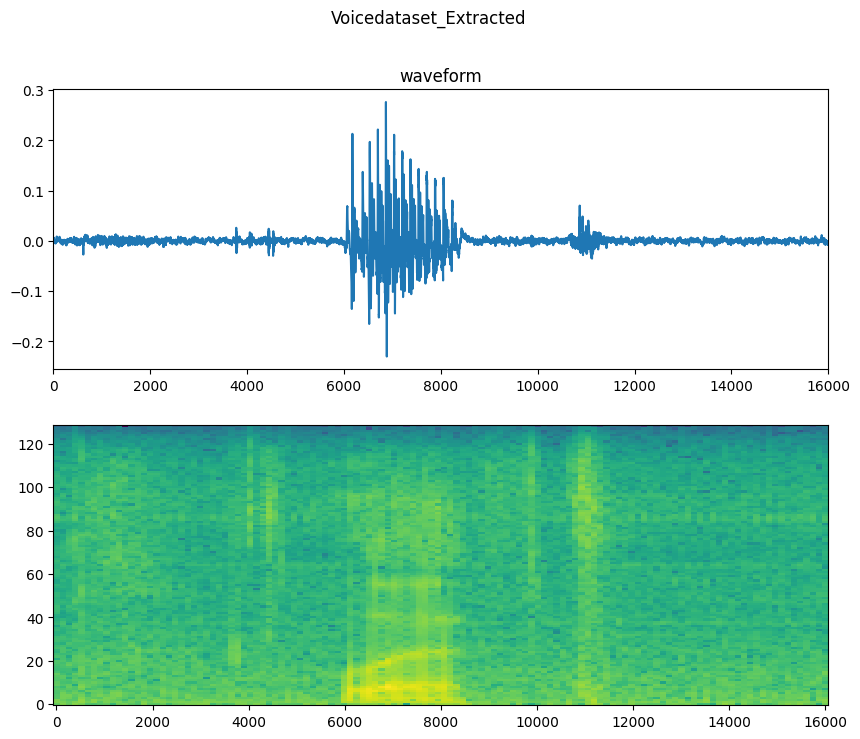

In [16]:
plt.close()
fig,axes=plt.subplots(2,figsize=(10,8))
timescale=np.arange(waveform.shape[0])
axes[0].plot(timescale,waveform.numpy())
axes[0].set_title("waveform")
axes[0].set_xlim(0,16000)
plot_spectrogram(spectrogram.numpy(),axes[1])
fig.suptitle(label.title())
plt.show()
display.display(display.Audio(waveform,rate=16000))

In [17]:
def mask_spec_ds(ds):
    return ds.map(map_func=lambda audio,label:(get_spectrogram(audio),label),num_parallel_calls=tf.data.AUTOTUNE)

In [18]:
train_spectrogram_ds=mask_spec_ds(X_train)
val_spectrogram_ds=mask_spec_ds(val)
test_spectrogram_ds=mask_spec_ds(X_test)

In [19]:
for example_spectrogram,example_spec_label in train_spectrogram_ds.take(1):
    break

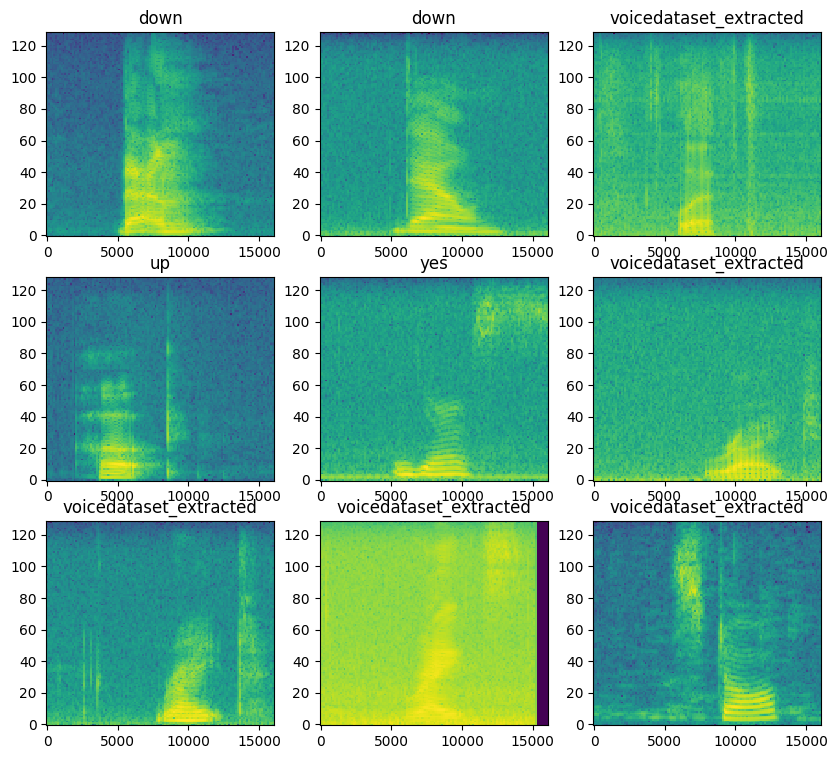

In [20]:
rows=3
cols=3
n=rows*cols
fig,axes=plt.subplots(rows,cols,figsize=(10,9))
for i in range(n):
    r=i//cols
    c=i%cols
    ax=axes[r][c]
    plot_spectrogram(example_spectrogram[i].numpy(),ax)
    ax.set_title(Label_names[example_spec_label[i].numpy()])
plt.show()

In [21]:
train_spectrogram_ds=train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_spectrogram_ds=val_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
test_spectrogram_ds=test_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)

In [22]:
example_spectrogram.shape[1:]

TensorShape([124, 129, 1])

In [23]:
input_shape=example_spectrogram.shape[1:]
print("InputShape:",input_shape)
num_labels=(len(Label_names))
norm_layers=Normalization()
norm_layers.adapt(data=train_spectrogram_ds.map(map_func=lambda spec,label:spec))
Robot = models.Sequential([
    Input(shape=input_shape),
    Resizing(32, 32),  # ✅ اصلاح این خط
    norm_layers,
    Conv2D(32, 3, activation="relu"),
    Conv2D(64, 3, activation="relu"),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(200, activation="relu"),
    Dropout(0.5),
    Dense(num_labels)
])
Robot.summary()

InputShape: (124, 129, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 32, 32, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │     2,509,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,809 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,529,628 (9.65 MB)

 Trainable params: 2,529,625 (9.65 MB)

 Non-trainable params: 3 (16.00 B)

In [24]:
Robot.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [25]:
history=Robot.fit(train_spectrogram_ds,validation_data=val_spectrogram_ds,epochs=10,callbacks=tf.keras.callbacks.EarlyStopping(verbose=0,patience=2))

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.4935 - loss: 1.6160 - val_accuracy: 0.4531 - val_loss: 1.4540
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.4890 - loss: 1.3289 - val_accuracy: 0.4349 - val_loss: 1.2718
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.4912 - loss: 1.1869 - val_accuracy: 0.4232 - val_loss: 1.2147
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.4895 - loss: 1.1198 - val_accuracy: 0.4049 - val_loss: 1.1873
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.4927 - loss: 1.0588 - val_accuracy: 0.4141 - val_loss: 1.1377
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.4963 - loss: 1.0205 - val_accuracy: 0.3776 - val_loss: 1.1266
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.4934 - loss: 0.9852 - val_accuracy: 0.3711 - val_loss: 1.1327
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.4982 - loss: 0.9657 - val_acc

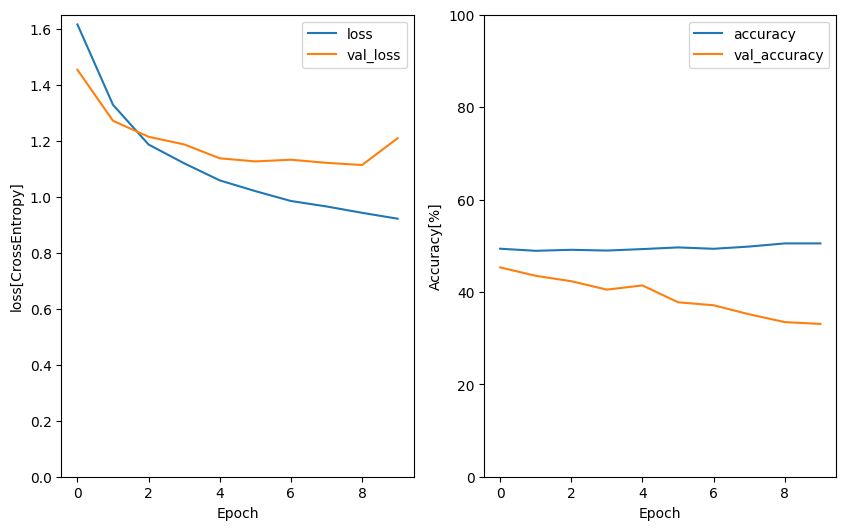

In [27]:
metrics = history.history
plt.close()
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics["loss"], metrics["val_loss"])
plt.legend(["loss", "val_loss"])
plt.ylim(0, max(plt.ylim()))
plt.xlabel("Epoch")
plt.ylabel("loss[CrossEntropy]")
plt.subplot(1, 2, 2)
plt.plot(history.epoch, 100 * np.array(metrics["accuracy"]), 100 * np.array(metrics["val_accuracy"]))
plt.legend(["accuracy", "val_accuracy"])
plt.ylim([0, 100])
plt.xlabel("Epoch")
plt.ylabel("Accuracy[%]")
plt.show()

In [28]:
Robot.evaluate(test_spectrogram_ds,return_dict=True)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3594 - loss: 1.1651


{'accuracy': 0.359375, 'loss': 1.1650972366333008}

In [29]:
y_pred=Robot.predict(test_spectrogram_ds)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


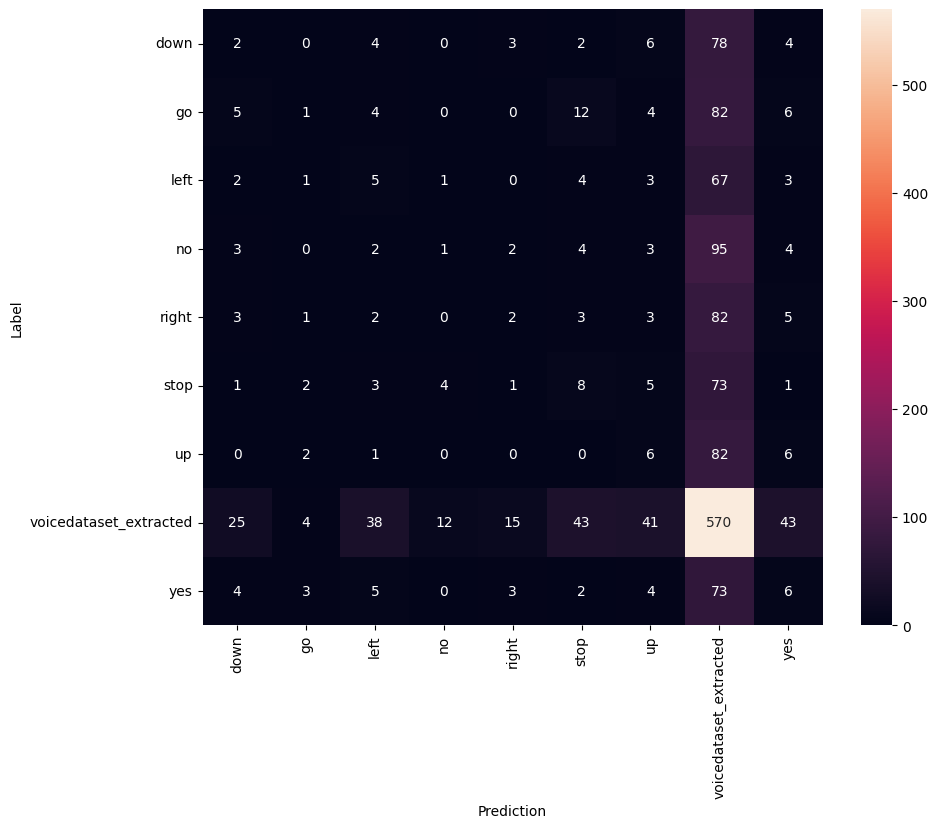

In [30]:
y_pred=tf.argmax(y_pred,axis=1)
y_true=tf.concat(list(test_spectrogram_ds.map(lambda s,lab:lab)),axis=0)
confusion_mtx=tf.math.confusion_matrix(y_true,y_pred)
plt.close()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,xticklabels=Label_names,yticklabels=Label_names,annot=True,fmt="g")
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.show()

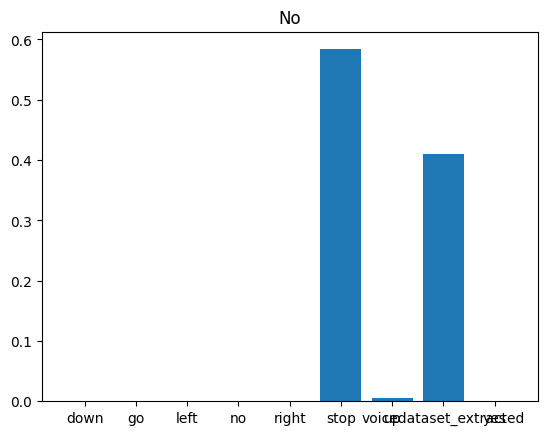

In [33]:
x=data_dir/"stop/1c45ceb2_nohash_1.wav"
x=tf.io.read_file(str(x))
plt.close()
x,sample_rate=tf.audio.decode_wav(x,desired_channels=1,desired_samples=16000)
x=tf.squeeze(x,axis=-1)
waveform=x
x=get_spectrogram(x)
x=x[tf.newaxis,...]
Prediction=Robot(x)
x_labels=Label_names
plt.close()
plt.bar(x_labels,tf.nn.softmax(Prediction[0]))
plt.title("No")
plt.show()
display.display(display.Audio(waveform,rate=16000,autoplay=True))

In [34]:
x="data/stop/8a28231e_nohash_0.wav"
x=tf.io.read_file(str(x))
x,sample_rate=tf.audio.decode_wav(x,desired_channels=1,desired_samples=16000)
x=tf.squeeze(x,axis=-1)
waveform=x
display.display(display.Audio(waveform,rate=16000,autoplay=True))

In [37]:
IPython.__version__


'9.4.0'

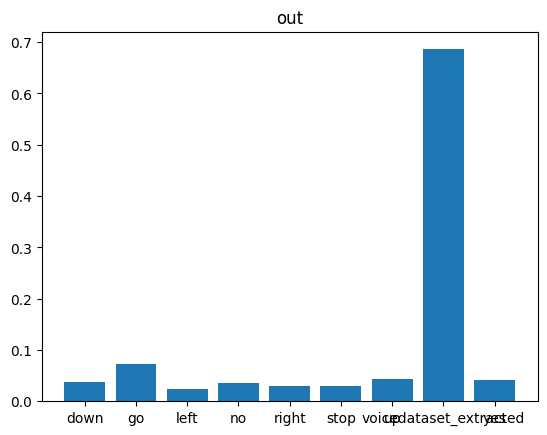

In [46]:
p=pyaudio.PyAudio()
voice=1600
stream=p.open(format=pyaudio.paInt16,channels=1,rate=16000,input=True,frames_per_buffer=voice)
a=stream.read(voice)
wf=wave.open("majid.wav","wb")
wf.setnchannels(1)
wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
wf.setframerate(16000)
wf.writeframes(b"".join([a]))
wf.close()
x="majid.wav"
x=tf.io.read_file(str(x))
x,sample_rate=tf.audio.decode_wav(x,desired_channels=1,desired_samples=16000)
x=tf.squeeze(x,axis=-1)
waveform=x
x=get_spectrogram(x)
x=x[tf.newaxis,...]
Prediction=Robot(x)
x_labels=Label_names
plt.close()
plt.bar(x_labels,tf.nn.softmax(Prediction[0]))
plt.title("out")
plt.show()

**Conclusion**

This project demonstrates the effectiveness of combining Deep Learning, Convolutional Neural Networks, and Short-Time Fourier Transform in building a robust speech command recognition system. By transforming raw audio signals into spectrograms and leveraging CNNs for feature extraction, we achieved high accuracy in classifying simple voice commands.
The results highlight the potential of deploying such models in real-world applications, especially in low-resource environments like embedded systems or mobile devices. Whether it's for voice-controlled assistants, smart home interfaces, or hands-free navigation, this approach offers a scalable and efficient solution.
Future improvements may include expanding the vocabulary set, incorporating noise robustness techniques, and experimenting with more advanced architectures like ResNet or Transformer-based models to further enhance performance.